In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, save_img
from keras.utils import np_utils
import tensorflow as tf

from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px

/Users/michael/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
picture = '/Users/michael/Desktop/Projects from ML BootCamp/Computer Vision/archive/img_align_celeba/img_align_celeba/000510.jpg'

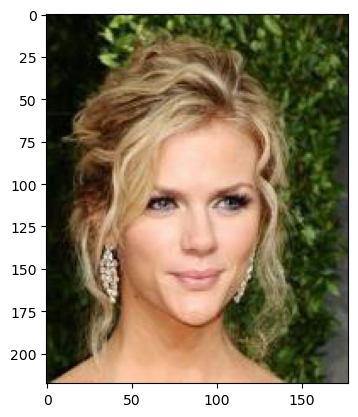

In [4]:
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()

In [5]:
df = pd.read_csv('/Users/michael/Desktop/Projects from ML BootCamp/Computer Vision/archive/list_attr_celeba.csv')
df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [6]:
df.set_index('image_id', inplace = True) # Setting 'image_id' column as Index
df.replace(to_replace = -1, value = 0,inplace = True ) # Replacing '-1' values for '0', indicating the absence of attributes in the image
df.head(10) # Displaying dataframe after changes

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
000006.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
000007.jpg,1,0,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
000008.jpg,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
000009.jpg,0,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [7]:
df.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [8]:
attractive = df[['Attractive']]
attractive.head(10)

,Attractive
image_id,
000001.jpg,1
000002.jpg,0
000003.jpg,0
000004.jpg,1
000005.jpg,1
000006.jpg,1
000007.jpg,1
000008.jpg,0
000009.jpg,1


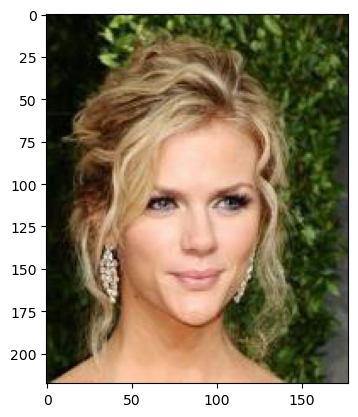

Attractive    1
Name: 000510.jpg, dtype: int64

In [9]:
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
attractive.loc[picture.split('/')[-1]][['Attractive']]

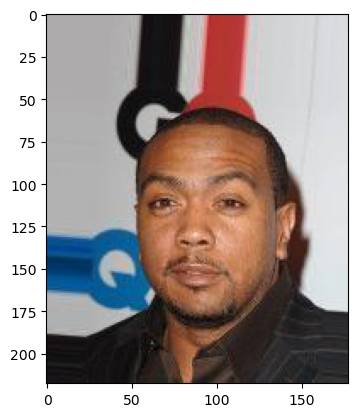

Attractive    0
Name: 000250.jpg, dtype: int64

In [10]:
img = mpimg.imread('/Users/michael/Desktop/Projects from ML BootCamp/Computer Vision/archive/img_align_celeba/img_align_celeba/000250.jpg')
imgplot = plt.imshow(img)
plt.show()
attractive.loc["/Users/michael/Desktop/Projects from ML BootCamp/Computer Vision/archive/img_align_celeba/img_align_celeba/000250.jpg".split('/')[-1]][['Attractive']]

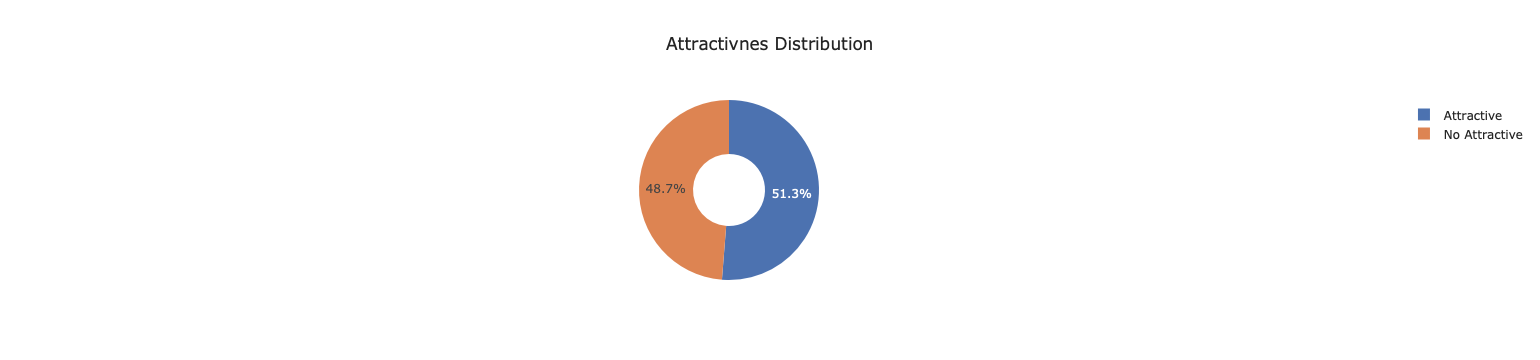

In [11]:
# Plotting attractiveness distribution pie plot
labels = {1:'Attractive', 0:'No Attractive'} # Assigning 'Attractive' value for 1 and 'No Attractive' value for 0
value_counts = attractive['Attractive'].value_counts()
values = pd.DataFrame({'Attractive': value_counts.index, 'count': value_counts.values})
values['Attractive'] = values['Attractive'].map(labels)
fig = px.pie(values, values = 'count', names = 'Attractive', template = 'seaborn',
            title = 'Attractivnes Distribution')
fig.update_traces(hole = .4)
fig.show()

In [12]:
partitions_df = pd.read_csv('/Users/michael/Desktop/Projects from ML BootCamp/Computer Vision/archive//list_eval_partition.csv')
partitions_df

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


In [13]:
partitions_counts = partitions_df['partition'].value_counts()
partitions_percentages = (partitions_df['partition'].value_counts(normalize=True) * 100).round(2)

partitions_values = pd.DataFrame({'count': partitions_counts, 'percentage':partitions_percentages})
partitions_values['percentage'] = partitions_values['percentage'].astype(str) + '%'

partitions_values.index = partitions_values.index.rename('partition')
partitions_values.index = partitions_values.index.map({0: 'Training',
                                                      1: 'Validation',
                                                      2: 'Testing'})
partitions_values

,count,percentage
partition,,
Training,162770,80.34%
Testing,19962,9.85%
Validation,19867,9.81%


In [14]:
# Setting index for 'partitions_df'
partitions_df.set_index('image_id', inplace = True)
partitions_df

,partition
image_id,
000001.jpg,0
000002.jpg,0
000003.jpg,0
000004.jpg,0
000005.jpg,0
...,...
202595.jpg,2
202596.jpg,2
202597.jpg,2


In [15]:
# Merging dataframes
data = attractive.merge(partitions_df['partition'], left_index = True, right_index = True)
data

,Attractive,partition
image_id,,
000001.jpg,1,0
000002.jpg,0,0
000003.jpg,0,0
000004.jpg,1,0
000005.jpg,1,0
...,...,...
202595.jpg,1,2
202596.jpg,0,2
202597.jpg,0,2


In [17]:
TRAINING_SAMPLES = 20000 # Defining the amount of samples for the training set
VALIDATION_SAMPLES = 3000 # Defining the amount of samples for the validation set
TEST_SAMPLES = 3000 # Defining the amount of samples for the testing set
IMG_WIDTH = 178 # Setting image width
IMG_HEIGHT = 218 # Setting image height

In [18]:
main_folder = '/Users/michael/Desktop/Projects from ML BootCamp/Computer Vision/archive/'
images_folder = main_folder + 'img_align_celeba/img_align_celeba/'

In [19]:
# Loading Images
def load_reshape_img(fname):
    img = load_img(fname) # Loading image 
    x = img_to_array(img)/255. # Converting to array and normalizing
    x = x.reshape((1,) + x.shape) # Reshaping array to have an extra dimension of size 1

    return x


# Generating datasets
def sets_generator(partition, attribute, num_samples):
    
    # Creating 'df_' dataframe, consisting of an equal number of samples for attractive and no attracive images
    # by selecting half of the samples with a value of 0 and half with a value of 1 from 'data' dataframe
    df_ = data[(data['partition'] == partition) 
                           & (data[attribute] == 0)].sample(int(num_samples/2))
    df_ = pd.concat([df_,
                      data[(data['partition'] == partition) 
                                  & (data[attribute] == 1)].sample(int(num_samples/2))])

    # For the training and validation sets
    if partition != 2:
        
        # Loading images and storing them in the 'x_' array
        x_ = np.array([load_reshape_img(images_folder + fname) for fname in df_.index])
        x_ = x_.reshape(x_.shape[0], 218, 178, 3)
        
        # Storing target variable in the 'y_' array
        y_ = np_utils.to_categorical(df_[attribute],2) # Converting binary attributes to categorical variables
        
    # For the testing set
    else:
        x_ = []
        y_ = []

        for index, target in df_.iterrows():
            
            # Taking images as input and resizing
            im = cv2.imread(images_folder + index)
            im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (IMG_WIDTH, IMG_HEIGHT)).astype(np.float32) / 255.0
            im = np.expand_dims(im, axis =0)
            x_.append(im) # Storing in normalized images
            y_.append(target[attribute]) # Storing in the target variable

    return x_, y_

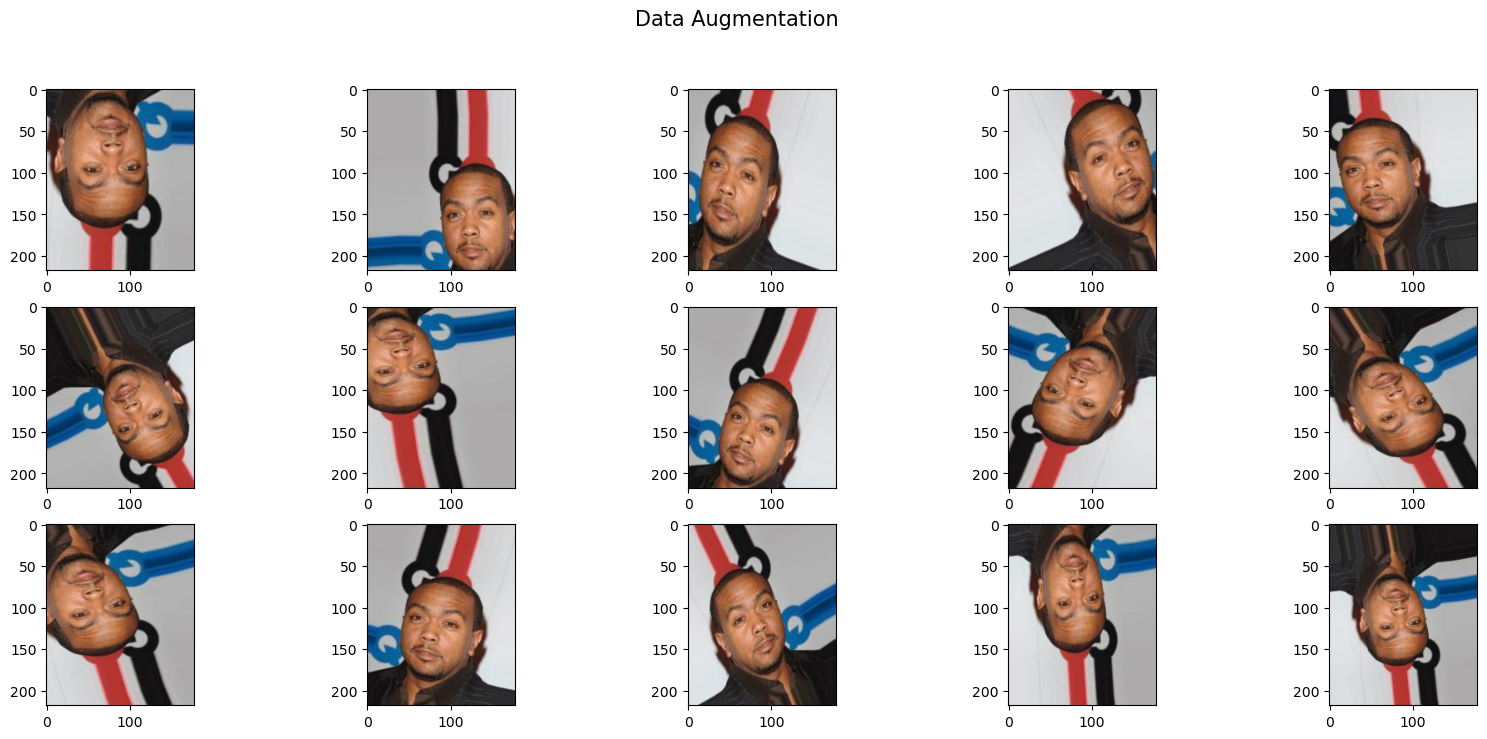

In [18]:
# Demonstrating Data Augmentation
datagen = ImageDataGenerator(
rotation_range = 30,  # Rotating image within an angle between 0 & 30 degrees
width_shift_range = 0.2, # Random horizontal shift
height_shift_range = 0.2, # Random vertical shift
shear_range = 0.2, # Random application of shearing transformations
zoom_range = 0.2, # Random zoom within range
horizontal_flip = True, # Horizontal flip
vertical_flip = True) # Vertical flip

# Loading example image 
img = load_img('/Users/michael/Desktop/Projects from ML BootCamp/Computer Vision/archive/img_align_celeba/img_align_celeba/000250.jpg')
x = img_to_array(img)/255.
x = x.reshape((1, ) + x.shape)

# Plotting Data Augmentation based on example image
plt.figure(figsize = (20, 8))
plt.suptitle('Data Augmentation', fontsize = 15)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.subplot(3, 5, i + 1)
    plt.grid = (False)
    plt.imshow(batch.reshape(218, 178, 3))
    
    if i == 14:
        break
    i += 1
    
plt.show()

In [20]:
# Splitting data
X_train, y_train = sets_generator(0, 'Attractive', TRAINING_SAMPLES)

In [21]:
# Applying Data Augmentation on training data
train_datagen = ImageDataGenerator(rotation_range = 30,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
vertical_flip = True)

train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train, y_train, batch_size = 16) 

In [22]:
# Splitting data
X_val, y_val = sets_generator(1, 'Attractive', VALIDATION_SAMPLES)

In [23]:
# Applying Data Augmentation on validation data
val_datagen = ImageDataGenerator(rotation_range = 30,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
vertical_flip = True)

val_datagen.fit(X_val)
val_generator = val_datagen.flow(X_train, y_train, batch_size = 16) 

In [24]:
# Loading InceptionV3
base_model = InceptionV3(weights = 'imagenet', include_top = False) 

# Freezing layers in the base model to prevent overfitting
for layer in base_model.layers:
    layer.trainable = False
    
# Adding new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x) 
predictions = Dense(2, activation = 'softmax')(x) 

# Defining final model
model = Model(inputs = base_model.input, outputs = predictions)

2023-10-10 15:07:02.313761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


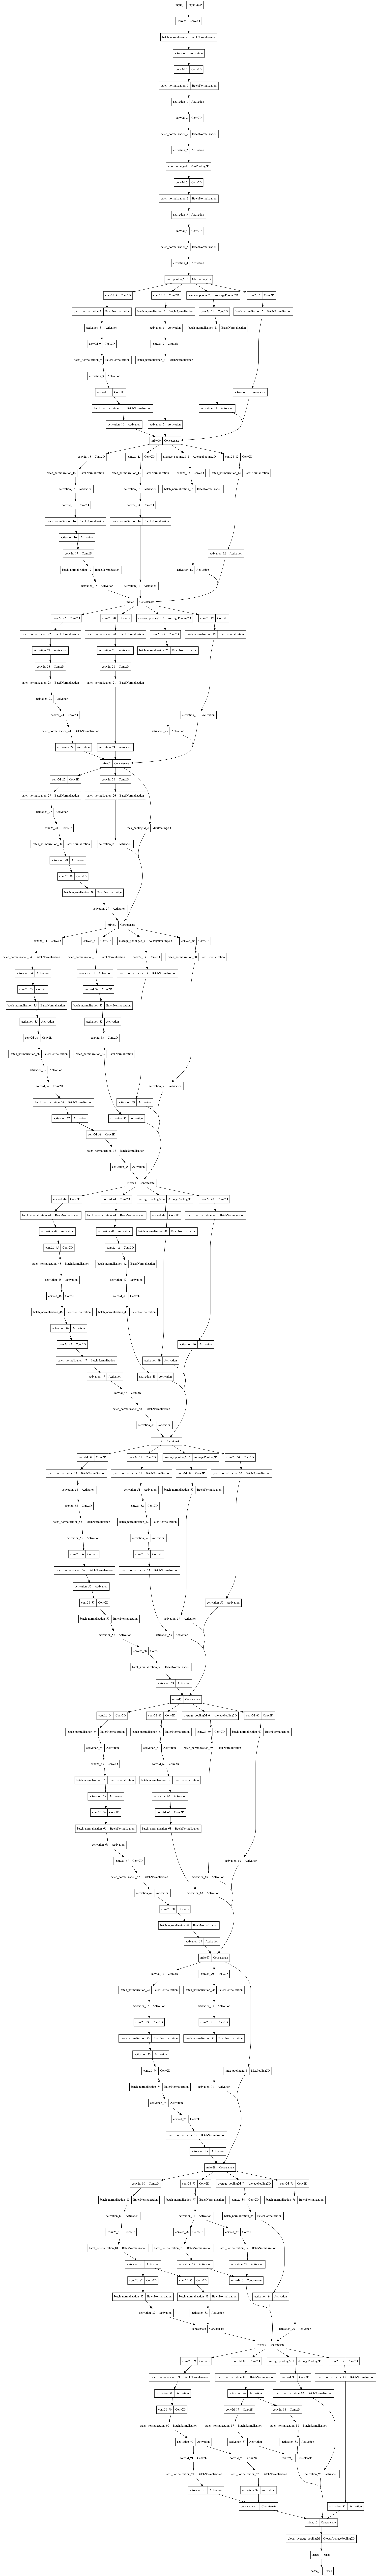

In [25]:
# Plotting model's architecture
tf.keras.utils.plot_model(model)

In [27]:
# Compiling model created above
from tensorflow.keras.optimizers import Adam
model.compile(Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [28]:
# ModelCheckpoint is used to save the best model 
checkpointer = ModelCheckpoint(filepath='weights.best.inc.attractiveness.hdf5', 
                               verbose=1, save_best_only=True)

In [29]:
history = model.fit(X_train, y_train,
         validation_data = (X_val, y_val), epochs = 10, batch_size = 32, callbacks=[checkpointer]) 

Epoch 1/3
625/625 [==============================] - ETA: 0s - loss: 0.5017 - accuracy: 0.7593
Epoch 1: val_loss improved from inf to 0.47062, saving model to weights.best.inc.attractiveness.hdf5
625/625 [==============================] - 686s 1s/step - loss: 0.5017 - accuracy: 0.7593 - val_loss: 0.4706 - val_accuracy: 0.7773
Epoch 2/3
625/625 [==============================] - ETA: 0s - loss: 0.4619 - accuracy: 0.7798
Epoch 2: val_loss improved from 0.47062 to 0.46542, saving model to weights.best.inc.attractiveness.hdf5
625/625 [==============================] - 649s 1s/step - loss: 0.4619 - accuracy: 0.7798 - val_loss: 0.4654 - val_accuracy: 0.7857
Epoch 3/3
625/625 [==============================] - ETA: 0s - loss: 0.4455 - accuracy: 0.7911
Epoch 3: val_loss did not improve from 0.46542
625/625 [==============================] - 650s 1s/step - loss: 0.4455 - accuracy: 0.7911 - val_loss: 0.4814 - val_accuracy: 0.7767


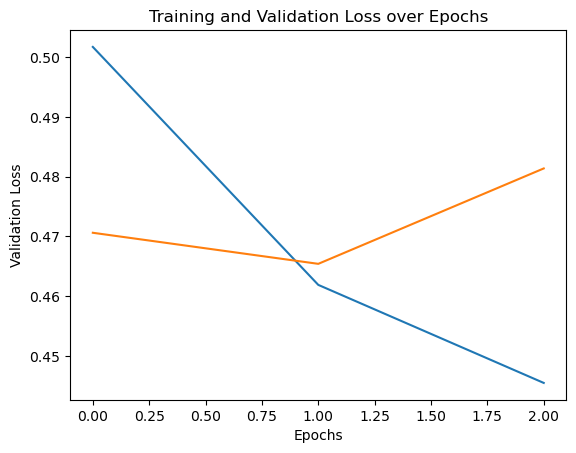

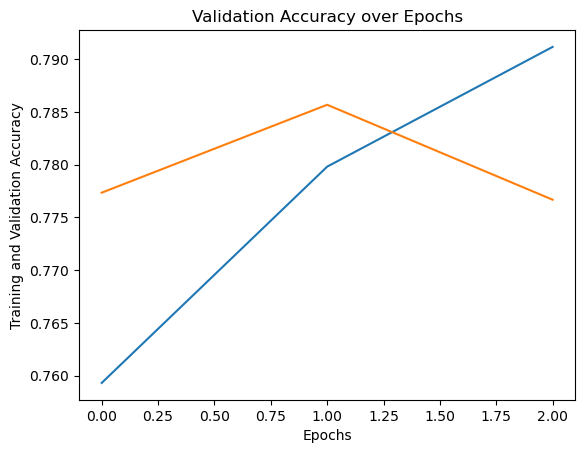

In [30]:
# Plotting loss function and accuracy over epochs
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(range(len(train_loss)), train_loss, label = 'Training Loss')
plt.plot(range(len(val_loss)), val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.show()

plt.plot(range(len(train_acc)), train_acc, label = 'Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

In [31]:
# Loading best model
model.load_weights('weights.best.inc.attractiveness.hdf5')

In [32]:
# Splitting testing data
X_test, y_test = sets_generator(2, 'Attractive', TEST_SAMPLES)

In [33]:
# Running predictions on testing data
from sklearn.metrics import accuracy_score
y_pred = [np.argmax(model.predict(feature)) for feature in X_test ]
acc = (accuracy_score(y_test, y_pred)) * 100

1/1 [==============================] - 0s 58ms/step


In [34]:
# Printing accuracy on testing data
print(f"Accuracy: %.2f%%" % acc)

Accuracy: 78.27%


In [35]:
# Saving model
model.save('attractiveness_recognition.h5')

In [36]:
# Creating HTML string to display model's results on testing set
attractive_target = {0: 'No Attractive'
                , 1: 'Attractive'}

def img_to_display(filename):
    
    i = Image.open(filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()
    

def display_result(filename, prediction, target): 
    attractive = 'Attractive'
    attractive_icon = "https://as1.ftcdn.net/v2/jpg/02/91/46/34/1000_F_291463479_B3rQDx9RKFlThaweWNDZGlSvZl2Yd3Ve.jpg" 
        
    if prediction[1] <= 0.5:
        attractive_icon = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQK5FJsHmIelVN4FKn_ijZ1LvMy3CBSZBIf-WTl7RljWg&s" 
        attractive = 'No Attractive'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 480px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <img src="{}" style="float: left;" width="40" height="40">
            <h3 style="margin-left: 50px; margin-top: 2px;">Prediction: {}</h3>
            <p style="margin-left: 50px; margin-top: -6px; font-size: 12px">{} probability</p>
            <p style="margin-left: 50px; margin-top: -16px; font-size: 12px">Real Atractiveness: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)  
               , attractive_icon
               , attractive
               , "{0:.2f}%".format(round(max(prediction)*100,2))
               , attractive_target[target]
               , filename.split('/')[-1]  
               )

    display(HTML(display_html))

In [37]:
def attractiveness_prediction(filename):  
   
    im = cv2.imread(filename)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    
    # prediction
    result = model.predict(im)
    prediction = np.argmax(result)
    
    return result

1/1 [==============================] - 0s 91ms/step


/var/folders/c7/8l3yy90x62j47t3pcpjq3g8r0000gn/T/ipykernel_10389/3822256550.py:8: DeprecationWarning:

LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.




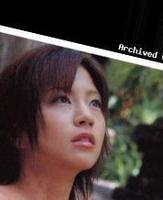

1/1 [==============================] - 0s 69ms/step



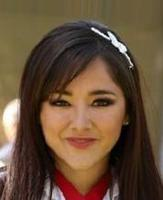

1/1 [==============================] - 0s 60ms/step



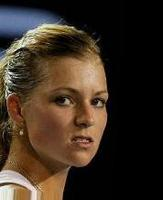

1/1 [==============================] - 0s 62ms/step



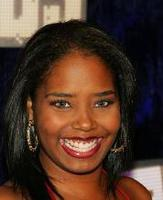

1/1 [==============================] - 0s 67ms/step



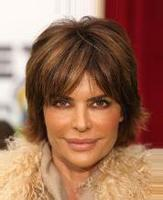

1/1 [==============================] - 0s 61ms/step



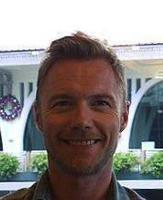

1/1 [==============================] - 0s 66ms/step



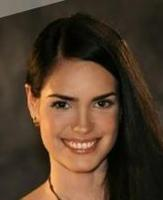

1/1 [==============================] - 0s 61ms/step



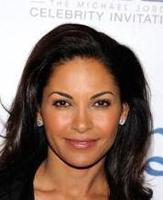

1/1 [==============================] - 0s 68ms/step



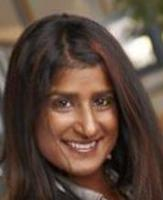

1/1 [==============================] - 0s 63ms/step



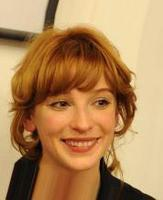

In [40]:
# Selecting random data from Testing set to be displayed
df_to_test = data[(data['partition'] == 2)].sample(10)

for index, target in df_to_test.iterrows():
    result = attractiveness_prediction(images_folder + index) 
    

    display_result(images_folder + index, result[0], target['Attractive']) 